In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def generate_observations(true_w, num, variance):
    """Generate dataset for logistic regression
    
    Parameters:
    true_w   -- the true logistic regression weights
    num      -- the number of data points to generate
    variance -- the multivariate normal variance for X
    """
    d = len(true_w)
    X = np.random.multivariate_normal(np.zeros(d), variance * np.identity(d), size=num)
    z = np.exp(X @ true_w)
    probs = z / (1+z)
    y = np.random.rand(num) < probs
    return X, y.astype(int), true_w

Note the log_liklihood does not include the $p(\vec{x})$ term, it's just $p(y|\vec{x})$

In [3]:
def log_likelihood(X, y, w):
    z = X@w
    return (y*z - np.log(1 + np.exp(z))).sum()

def grad_log_likelihood(X, y, w):
    z = np.exp(X@w)
    t = y - (z/(1+z))
    return (X*t[:,np.newaxis]).sum(axis=0)

In [4]:
def do_gd(X, y, true_w, lr=0.001, max_iter=1000):
    vals = []
    grads = []
    mse = []
    w = np.ones(X.shape[1])
    grad = grad_log_likelihood(X, y, w)
    count = 0
    while np.linalg.norm(grad) > 1e-2 and count < max_iter:
        vals.append(log_likelihood(X, y, w))
        grads.append(np.linalg.norm(grad))
        mse.append(np.linalg.norm(w - true_w, ord=2))
        w += lr*grad
        grad = grad_log_likelihood(X, y, w)
        count += 1        
    return w, vals, grads, mse

## Generate Observations

Choose a true weight vector $\vec{w}$ and generate the corresponding observations.

In [5]:
dimensions = 5
num_observations = 10000
X_variance = 1 
w = np.random.rand(dimensions)

X, y, w = generate_observations(w, num_observations, X_variance)

## Perform Gradient Descent

In [6]:
w_calc, vals, grads, mse = do_gd(X, y, w, lr=0.0001)

## Plot Results

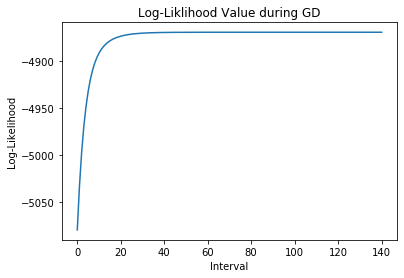

In [7]:
plt.plot(vals)
plt.title("Log-Liklihood Value during GD")
plt.xlabel("Interval")
plt.ylabel("Log-Likelihood");

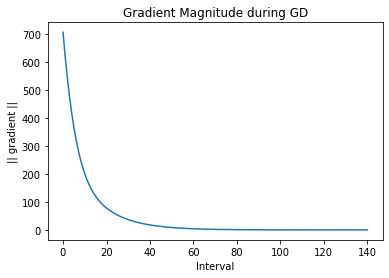

In [8]:
plt.plot(grads)
plt.title("Gradient Magnitude during GD")
plt.xlabel("Interval")
plt.ylabel("|| gradient ||");

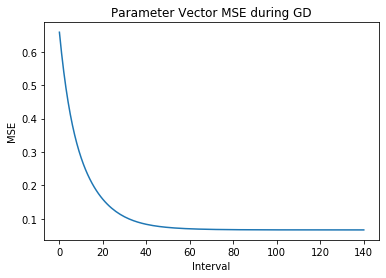

In [9]:
plt.plot(mse)
plt.title("Parameter Vector MSE during GD")
plt.xlabel("Interval")
plt.ylabel("MSE");

In [10]:
print("True w     Calc w")
for i in range(len(w)):
    print("{:.4f}     {:.4f}".format(w[i], w_calc[i]))

True w     Calc w
0.9583     0.9520
0.8474     0.8357
0.9188     0.9643
0.5927     0.6248
0.5145     0.5497
